In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.utils.class_weight import compute_class_weight
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("multi_class/data.csv")

In [3]:
df.head()

,Title,Conference
0,Innovation in Database Management: Computer Sc...,VLDB
1,High performance prime field multiplication fo...,ISCAS
2,enchanted scissors: a scissor interface for su...,SIGGRAPH
3,Detection of channel degradation attack by Int...,INFOCOM
4,Pinning a Complex Network through the Betweenn...,ISCAS


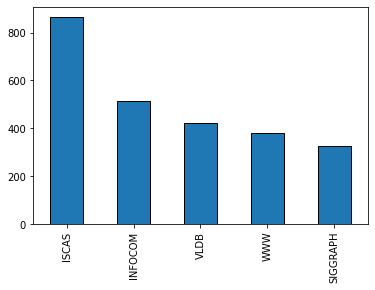

In [4]:
df["Conference"].value_counts().plot(kind="bar", edgecolor='black');

In [5]:
df["len"] = df["Title"].apply(lambda x: len(x.split()))

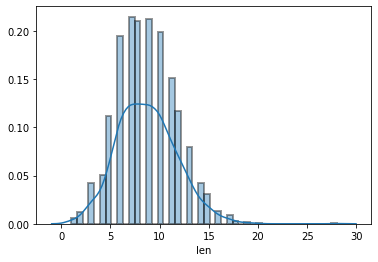

In [6]:
sns.distplot(df["len"], hist_kws=dict(edgecolor="k", linewidth=2));

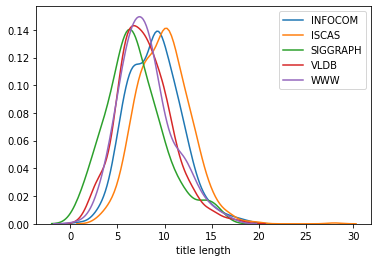

In [7]:
df.groupby("Conference")["len"].apply(lambda x: sns.distplot(x, hist=False, label=x.name));
plt.xlabel("title length");

In [8]:
df.drop("len", axis=1, inplace=True)

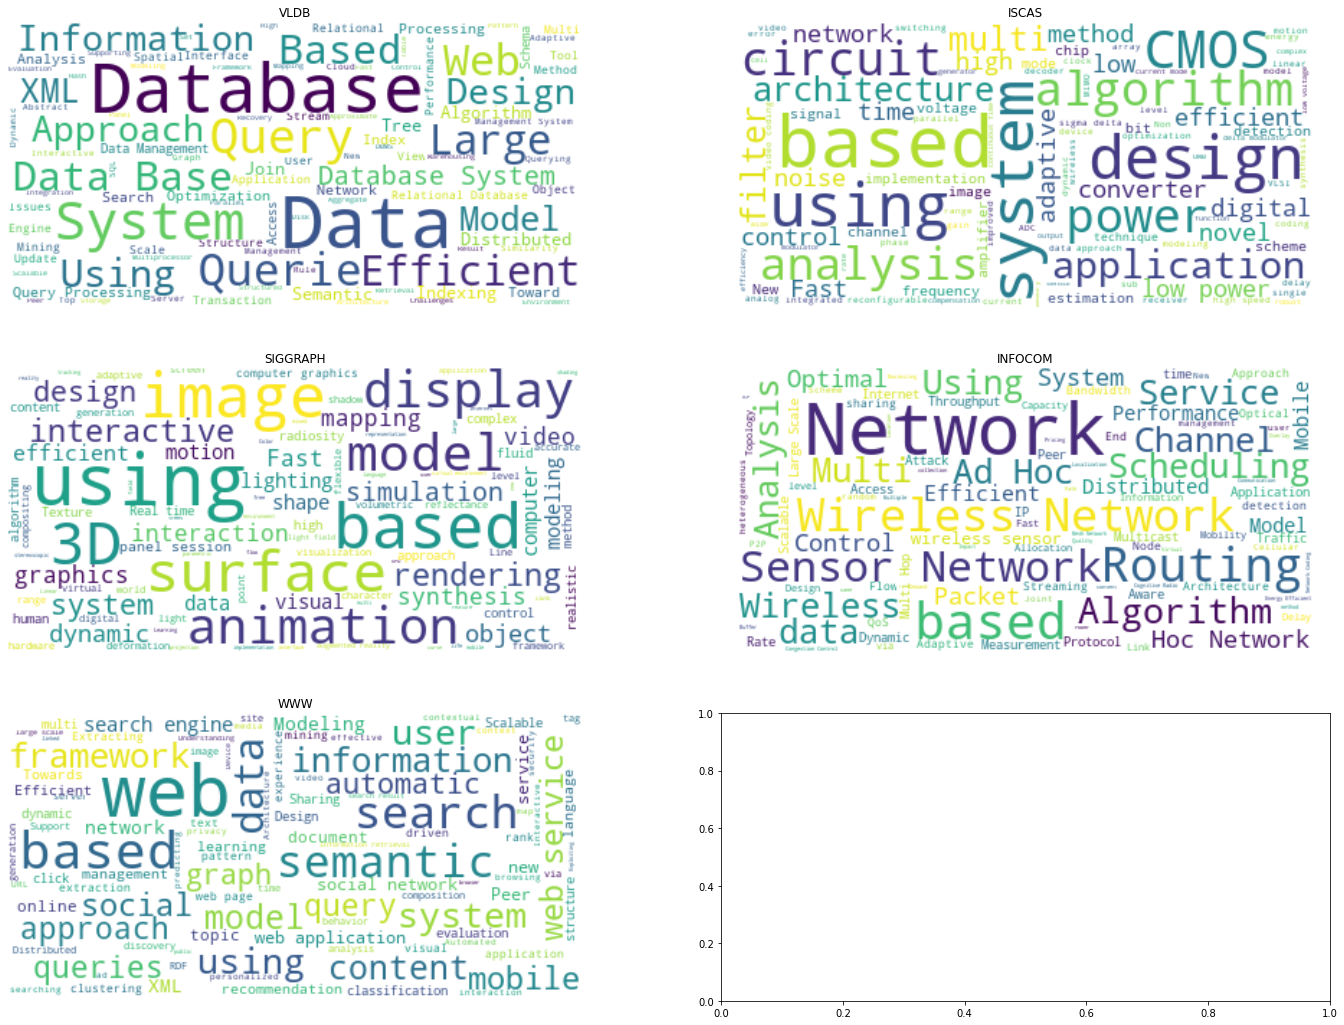

In [9]:
fix, ax = plt.subplots(nrows=3, ncols=2, figsize=(24, 18))

for i, cat in enumerate(df["Conference"].unique()):
    row = i // 2
    col = i % 2
    d = df[df["Conference"] == cat]
    text=d.Title.values

    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(" ".join(text));
    ax[row, col].set_title(cat)
    ax[row, col].imshow(wordcloud, interpolation="bilinear");
    ax[row, col].axis("off");

In [10]:
df = df.sample(frac=1)
len_df = len(df)

train_idx = int(.8 * len_df)
df_train = df.iloc[:train_idx]
df_test = df.iloc[train_idx:]

df_train.to_csv("multi_class/train.csv", index=False)
df_test.to_csv("multi_class/test.csv", index=False)

In [15]:
# computing class weights
label_maper = {key: i for i, key in enumerate(df["Conference"].unique())}
label = df_train["Conference"].apply(lambda x : label_maper[x]).values

compute_class_weight('balanced', np.unique(label), label)

array([0.57041252, 0.97094431, 1.3147541 , 1.57874016, 1.21515152])